In [1]:
import tensorflow

In [2]:
print(tensorflow.__version__)

1.15.0


In [1]:
!pip install tensorflow-gpu==2.0

     |████████████████████████████████| 380.8MB 47kB/s 
     |████████████████████████████████| 3.8MB 45.2MB/s 
     |████████████████████████████████| 450kB 58.4MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
import tensorflow

In [4]:
print(tensorflow.__version__)

2.0.0


In [0]:
# 注释：安装tensorflow2.0，import tensorflow.keras as keras，可以使用tensorflow内集成的keras模块，神经网络编写接口友善

In [0]:
import tensorflow.keras as keras

In [7]:
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
#引入Keras自带手写数字数据集，且自动按照七三开比例划分训练数据集与测试数据集，初次运行，下载时间在5分钟左右

In [10]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


In [0]:
#引入python-matlab接口，实现画图功能，看看图像和标签的模样

Text(0.5, 1.0, 'Class 5')

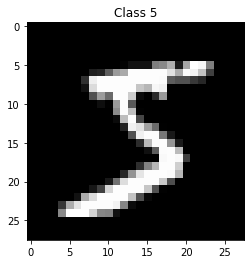

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [0]:
#图像reshape到28*28*1灰度图（宽度、高度、像素通道）

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [0]:
#图像像素是0-255（2^8)，在实际处理中，为了便于梯度相关的优化算法，需要对图像像素做归一化处理

In [18]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [0]:
#0-9的数字一共十类，对标签进行独热编码

In [0]:
#引入numpy库，python矩阵运算相关的library

In [0]:
import numpy as np

In [0]:
from keras.utils import np_utils

In [23]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [0]:

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from tensorflow.keras.layers import LeakyReLU

In [0]:
# CNN三步走
# 1. 卷积层
# 2. 非线性激活函数
# 3. 池化层
# 重复堆叠操作
#这构成了VGG的基本结构，本模型在VGG的基本框架上加入Dropout和BatcchNormalization，Dropout可以起到正则化作用，BN则进行数据归一化，使得模型训练梯度稳定
#BN可以跟Dropout结合用，但在使用BN的情况下，Dropout的参数设置成0.05-0.1

# 4.全连接层
#为了正则化，可以加入Dropout
#为了防止分布漂移，可以加入BathcNormalization
#这里先是使用32个感受野为3*3的卷积滤波器，再加入Relu激活函数，BatcchNormalization为正则化的操作，再卷积+激活函数+最大池化，在64个滤波器的卷积核操作上重复

In [0]:
from tensorflow.keras import backend

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization())
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

model.add(BatchNormalization())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [0]:
#model.summary()看结构

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 32)        1

In [0]:
from tensorflow.keras.optimizers import Adam

In [0]:
#Adam 作为优化器，更多其介绍，参考Adam论文https://arxiv.org/abs/1412.6980

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [0]:
#ImageDataGenerator引入Keras图像处理接口，参考https://keras.io/zh/preprocessing/image/

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
#训练数据增强应对潜在的过拟合风险，测试数据不增强

In [0]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [0]:
train_generator=gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [0]:
#训练5个epoch，看效果

In [55]:
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5
937/937 [==============================] - 78s 83ms/step - loss: 0.1326 - accuracy: 0.9592 - val_loss: 0.0445 - val_accuracy: 0.9866
Epoch 2/5
937/937 [==============================] - 71s 75ms/step - loss: 0.0559 - accuracy: 0.9830 - val_loss: 0.0302 - val_accuracy: 0.9898
Epoch 3/5
937/937 [==============================] - 69s 74ms/step - loss: 0.0446 - accuracy: 0.9856 - val_loss: 0.0263 - val_accuracy: 0.9907
Epoch 4/5
937/937 [==============================] - 69s 74ms/step - loss: 0.0392 - accuracy: 0.9876 - val_loss: 0.0191 - val_accuracy: 0.9936
Epoch 5/5
937/937 [==============================] - 69s 74ms/step - loss: 0.0388 - accuracy: 0.9878 - val_loss: 0.0364 - val_accuracy: 0.9880


In [0]:
#在测试集上看效果

In [57]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
#如果同时安装2.0以上tensorflow和keras，需要显式指定tesorflow,keras，不然一些同名的函数内部实现和归属的域不一样，可能会发生命名冲突